## Surface spatial distribution

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import math

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['orangered', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177', '#c51b8a', '#f768a1', '#fbb4b9','#feebe2']
r_pl_cmap = plt.get_cmap('RdPu_r')

In [5]:
region = ['EqPac','NPSG']
mortality = 0.39              # [d-1]
runtime = 80                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'markov_0_KPP_reflect_tidal'
sizebinedges = [5e-3, 5e-4, 5e-5, 5e-6, 5e-7]

In [6]:
ds_0 = xr.open_dataset(datadir+'regional_'+region[0]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region[1]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
# ds_2 = xr.open_dataset(datadir+'regional_'+region[2]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/rfischer/Kooi_data/data_output/regional_EqPac_bfadv_Jan_2004_039mort_markov_0_KPP_reflect_tidalmixing_80days_60dtsecs_12hrsoutdt.nc'

In [ ]:
dslist = [ds_0, ds_1]#, ds_2]

In [ ]:
number_of_trajectories_to_plot = 225
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

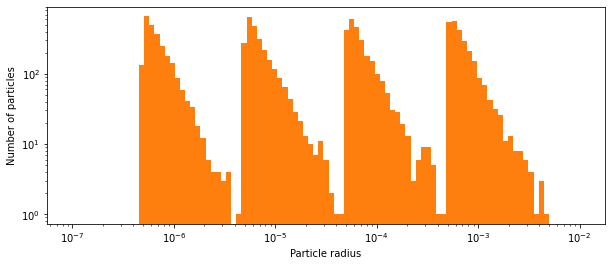

In [23]:
fig = plt.figure(figsize=(10,4)),
ax=plt.axes()
for ds in dslist:
    ax.hist(ds['r_pl'],np.logspace(math.floor(np.log10(ds['r_pl'].min())),math.ceil(np.log10(ds['r_pl'].max())),100))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Number of particles')
ax.set_xlabel('Particle radius')
plt.show()

In [40]:
split_ds_0 = list(ds_0.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_1 = list(ds_1.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
# split_ds_2 = list(ds_2.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_dslist = [split_ds_0, split_ds_1]

IndexError: list index out of range

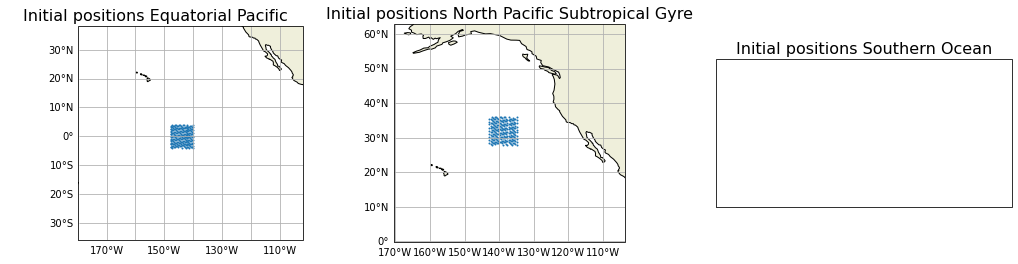

In [11]:
fig = plt.figure(figsize=(18,4))

gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2],projection=ccrs.PlateCarree())
axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    ax.set_title('Initial positions '+ regions[region[i]], fontsize=16)
    ax.scatter(dslist[i]['lon'][::f_plt,0],dslist[i]['lat'][::f_plt,0],s=1)
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_ylim(np.min(dslist[i]['lat'])-25,np.max(dslist[i]['lat'])+25)
    ax.set_xlim(np.min(dslist[i]['lon'])-25,np.max(dslist[i]['lon'])+25)
# plt.show()

IndexError: list index out of range

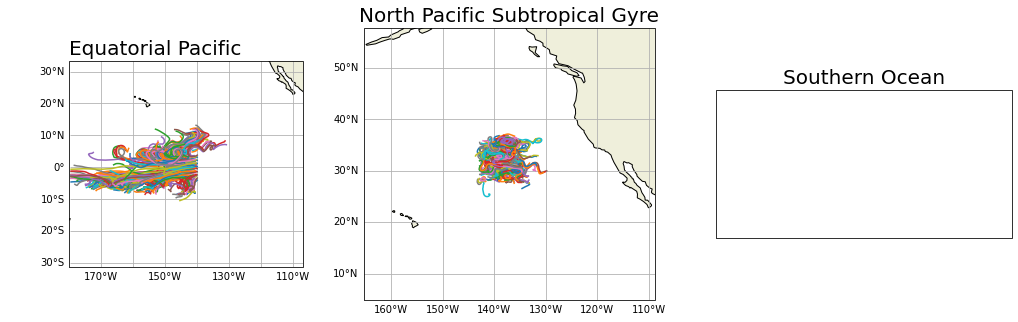

In [12]:
fig = plt.figure(figsize=(18,5))
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2],projection=ccrs.PlateCarree())
axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    ax.set_title(regions[region[i]], fontsize=20)

    ax.plot(dslist[i]['lon'].T[:,::f_plt],dslist[i]['lat'].T[:,::f_plt])
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_ylim(np.min(dslist[i]['lat'])-20,np.max(dslist[i]['lat'])+20)
    ax.set_xlim(np.min(dslist[i]['lon'])-20,np.max(dslist[i]['lon'])+20)
plt.show()

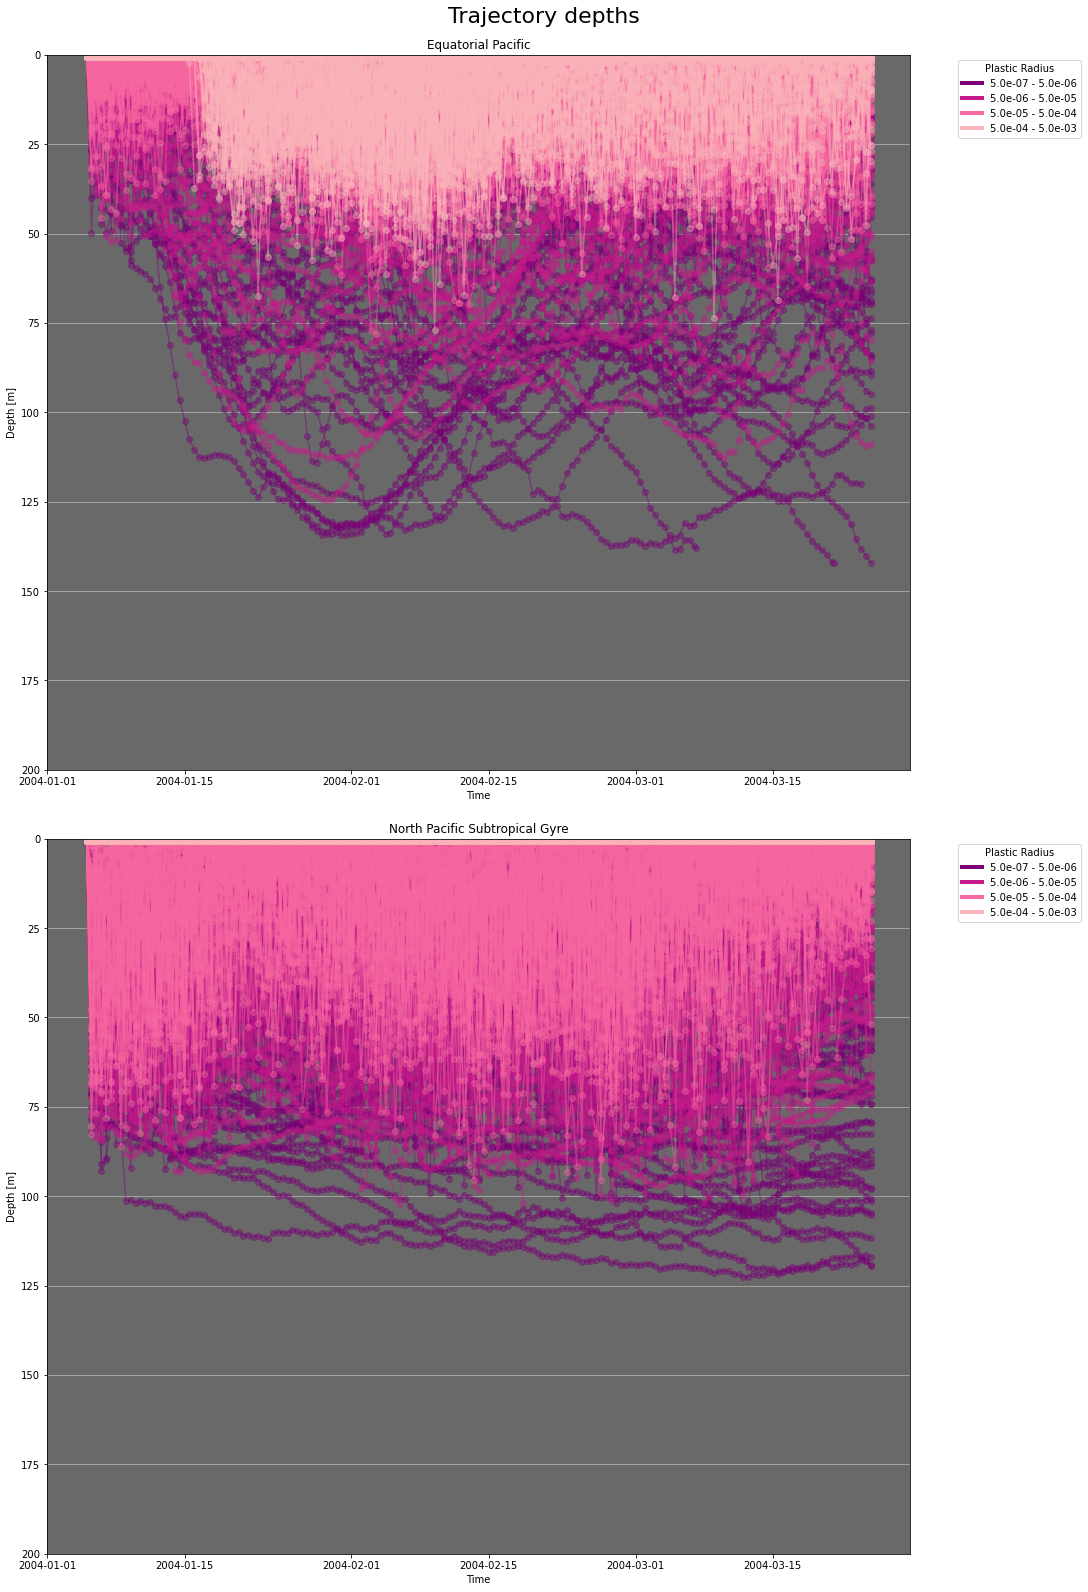

In [41]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,22), constrained_layout=True)
fig.suptitle('Trajectory depths', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)
    
ax1.set_title(regions[region[0]])
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Time')
ax1.set_facecolor('dimgray')
ax1.set_ylim(200,0)
ax1.grid(b=True, axis='y')

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax1.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)    

ax2.set_title(regions[region[1]])
ax2.set_ylabel('Depth [m]')
ax2.set_xlabel('Time')
ax2.set_facecolor('dimgray')
ax2.set_ylim(200,0)
ax2.grid(b=True, axis='y')

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

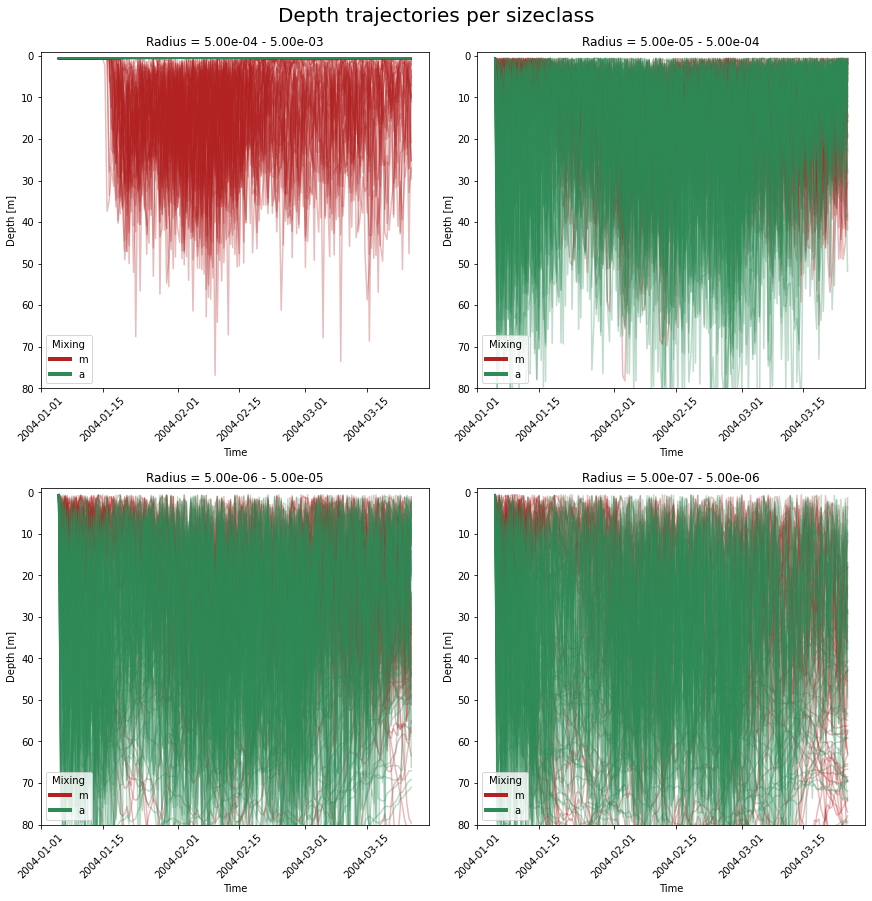

In [42]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
fig.suptitle('Depth trajectories per sizeclass', fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3, ax4]

for r, ax in enumerate(axes):
    for i in range(len(region)):
        split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
        ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

    ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[r][0].left, right=split_ds[r][0].right))
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('Time')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(80,-1)

    custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                    Line2D([0], [0], color=mixing_cmap[1], lw=4)]

    ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
    
    
plt.show()

In [9]:
w_bins = [-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
w_bincenters = [-2e-1, -2e-2, -2e-3, -2e-4, -2e-5, 0, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]
w_list = ['w_m', 'vs_init', 'w_adv', 'w_m_b']
w_list_names = ['KPP Wind mixing', 'Potential settling velocity', 'Model advection',  'Tidal mixing']
w_pdf = np.zeros((len(dslist),len(w_list),len(w_bins)-1))
linestyles=['-','-.']

for i,ds in enumerate(dslist):
    for j,w in enumerate(w_list):
        vals, bins = np.histogram(ds[w], w_bins)
        w_pdf[i,j,:] = vals/ds[w].size

In [10]:
w_widths = np.ones(w_pdf.shape[2])
w_centers = np.arange(w_pdf.shape[2])
w_edges = np.arange(w_pdf.shape[2]+1)-0.5
w_bin_str = [np.format_float_scientific(w,2,exp_digits=1) for w in w_bins]

In [11]:
w_pdf_sizes = np.zeros((len(dslist),len(w_list),len(sizebinedges)-1,len(w_bins)-1))

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for j,w in enumerate(w_list):
        for k,ds_r in enumerate(split_ds):
            vals, bins = np.histogram(ds_r[1][w], w_bins)
            w_pdf_sizes[i,j,k,:] = vals/ds_r[1][w].size

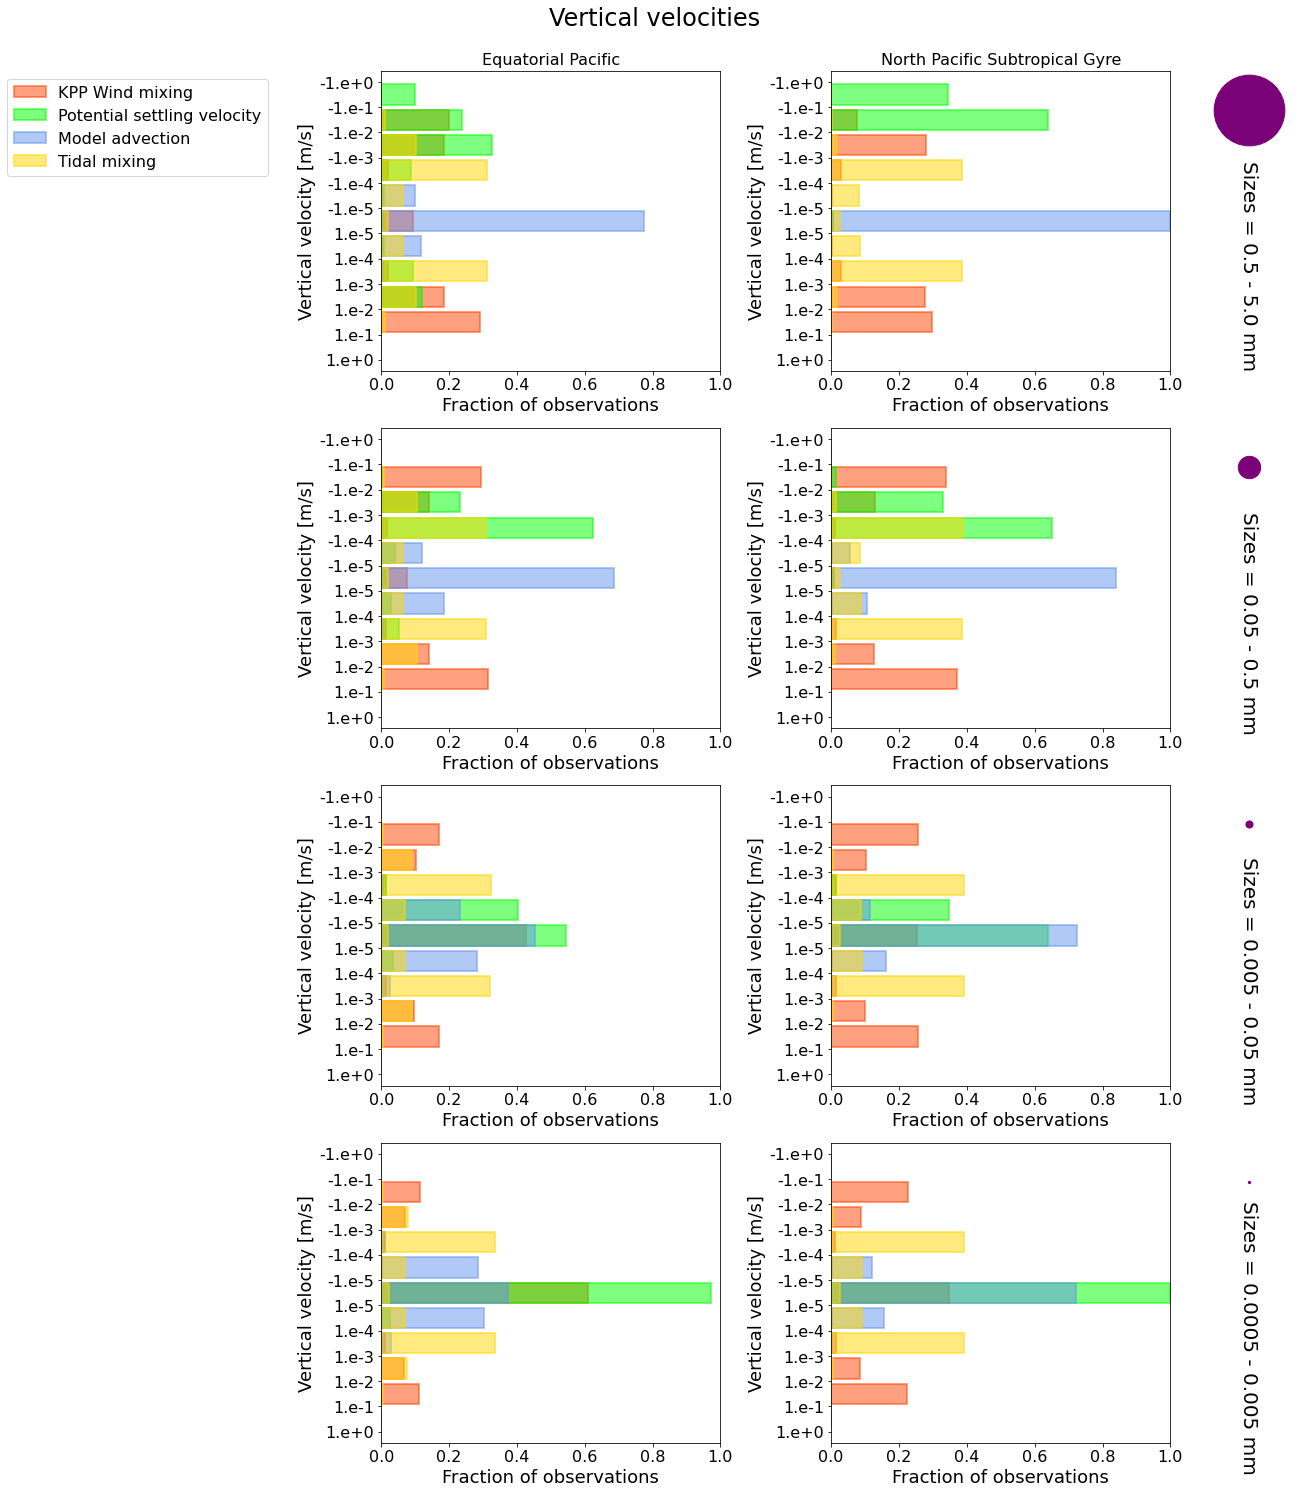

In [12]:
fig = plt.figure(figsize=(18,20),constrained_layout=True)
fig.suptitle('Vertical velocities', fontsize=24, y=1.03)
gs = gridspec.GridSpec(ncols=3, nrows=4, width_ratios=[1,1,0.3],figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
ax11 = fig.add_subplot(gs[2, 2])
ax12 = fig.add_subplot(gs[3, 2])
axes = [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]]

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        for j,w in enumerate(w_list):
            axes[i][k].barh(w_centers, w_pdf_sizes[i,j,k], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w_list_names[j])
        axes[i][k].set_xlim(0,1.)
        axes[i][k].set_yticks(w_edges)
        axes[i][k].set_yticklabels(w_bin_str)
        axes[i][k].invert_yaxis()
        axes[i][k].tick_params(axis='both', labelsize=16)
        axes[i][k].set_xlabel('Fraction of observations', fontsize=18)
        axes[i][k].set_ylabel('Vertical velocity [m/s]', fontsize=18)
    axes[i][0].set_title(regions[region[i]], fontsize=16)
    
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
for k, ds_r in enumerate(split_ds):
    axes[2][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[2][k].set_ylim(0,1)
    axes[2][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[2][k].axis('off')
axes[0][0].legend(fontsize=16, bbox_to_anchor=(-0.31, 1))